# Spotify Analysis: Study of song factors and the positive correlation to streaming

## Members
- Joey Beightol
- Ryan Lucero
- Matthew Parker

## Objective:


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

/var/folders/qx/p_nk1z1955n4bz60478z102c0000gn/T/ipykernel_20255/1376719126.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load in Data

In [2]:
# Load data from a CSV file into a DataFrame
spotifyDF = pd.read_csv('spotify-2023.csv', encoding='latin-1')

# Display the first few rows of the DataFrame
display(spotifyDF.head())

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Clean the data

In [3]:
#Removing any types that are not a number in streams column
spotifyDF['streams'] = pd.to_numeric(spotifyDF['streams'], errors='coerce')
spotifyDF = spotifyDF.dropna(subset=['streams'])
spotifyDF= spotifyDF.reset_index(drop=True)
spotifyDF.dtypes


track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

### Take look at data

In [4]:
#describe the dataframe
spotifyDF.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [5]:
#Find all null values
spotifyDF.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [6]:
#Duplication
spotifyDF.duplicated().sum()

0

In [7]:
#Drop all na values
spotifyDF.replace('None', np.nan, inplace=True)
spotifyDF_cleaned = spotifyDF.dropna(subset=['key'])
spotifyDF_cleaned.isna().sum()



track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        41
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

## Visualizing Data

### Artist Streams

In [8]:
#artist streams
artistStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='artist(s)_name', aggfunc='sum')
display(artistStreams.sort_values(by='streams',ascending=False).head())


,streams
artist(s)_name,
Ed Sheeran,1.390895e+10
Taylor Swift,1.185115e+10
The Weeknd,1.006933e+10
Bad Bunny,8.582384e+09
Harry Styles,8.546679e+09


### Month Realeased Streams

Total Streams


,streams
released_month,
1,8.878917e+10
5,4.815132e+10
9,3.934781e+10
11,3.864161e+10
10,3.774078e+10


Average Streams


,streams
released_month,
9,7.715258e+08
1,7.399097e+08
8,6.237728e+08
10,5.718300e+08
11,5.600234e+08


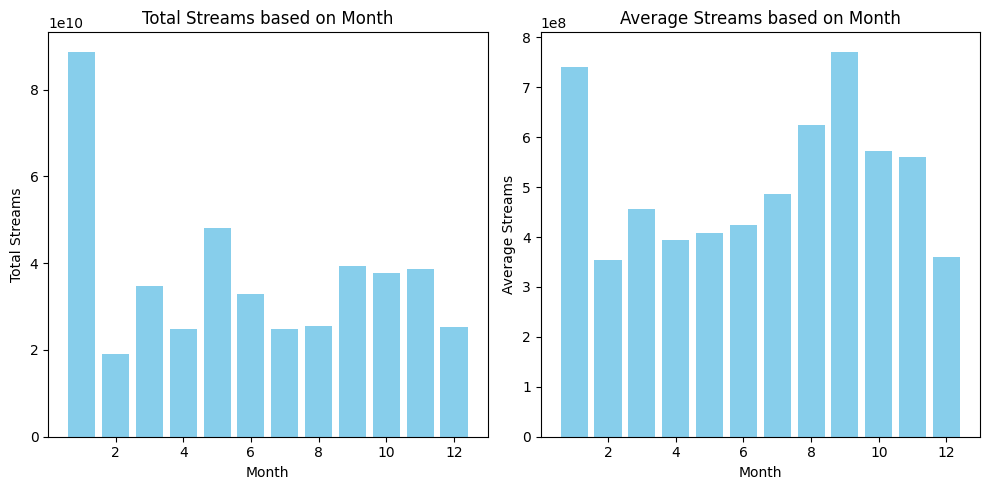

In [9]:
#Total streams based on danceability
monthlyStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='released_month', aggfunc='sum')
print('Total Streams')
display(monthlyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on danceability
monthlyStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='released_month', aggfunc='mean')
print('Average Streams')
display(monthlyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Month
axs[0].bar(monthlyStreams.index, monthlyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Month')
#Average streams vs. Month
axs[1].bar(monthlyStreamAvg.index, monthlyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Month')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### BPM and Streams

Total Streams


,streams
bpm,
120,1.451305e+10
110,1.280398e+10
124,1.172844e+10
95,1.120815e+10
150,1.071588e+10


Average Streams


,streams
bpm,
171,2.409867e+09
179,1.735442e+09
186,1.718833e+09
173,1.269461e+09
181,1.256881e+09


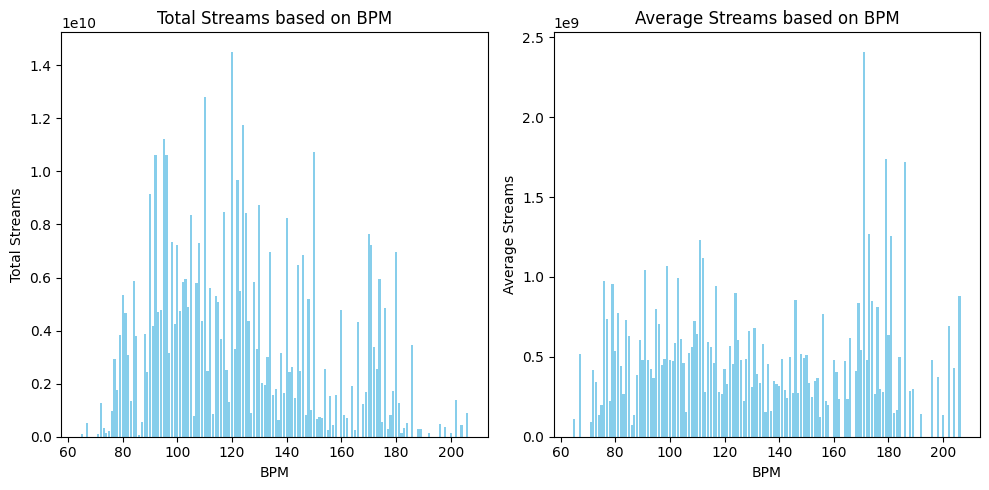

In [10]:
#Total streams based on BPM
bpmStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='bpm', aggfunc='sum')
print('Total Streams')
display(bpmStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on BPM
bpmStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='bpm', aggfunc='mean')
print('Average Streams')
display(bpmStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. BPM
axs[0].bar(bpmStreams.index, bpmStreams['streams'], color='skyblue')
axs[0].set_xlabel('BPM')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on BPM')
#Average streams vs. BPM
axs[1].bar(bpmStreamAvg.index, bpmStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('BPM')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on BPM')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### Key and Streams

Total Streams


,streams
key,
C#,7.251363e+10
G,4.344954e+10
G#,4.339898e+10
D,4.289157e+10
B,4.206718e+10


Average Streams


,streams
key,
C#,6.042802e+08
E,5.774972e+08
D#,5.530365e+08
A#,5.524754e+08
D,5.295256e+08


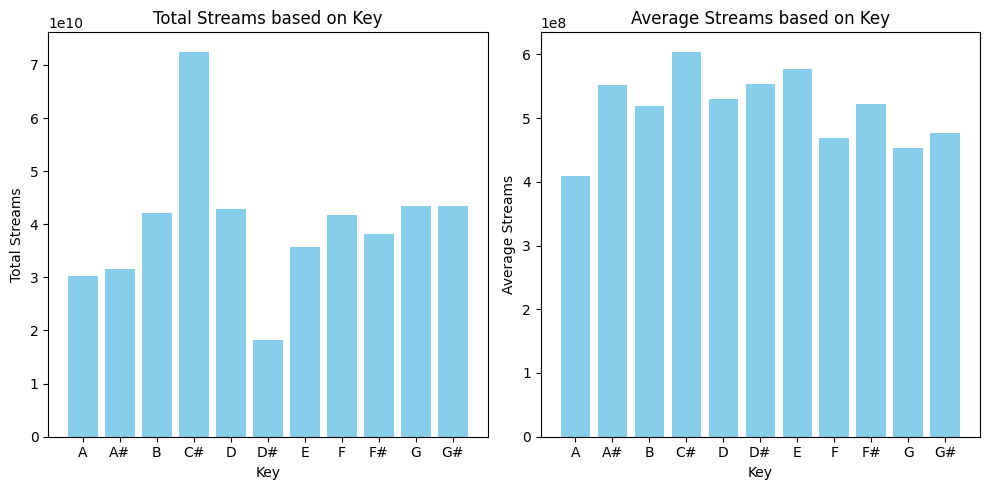

In [11]:
#Total streams based on Key
keyStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='key', aggfunc='sum')
print('Total Streams')
display(keyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Key
keyStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='key', aggfunc='mean')
print('Average Streams')
display(keyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Key
axs[0].bar(keyStreams.index, keyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Key')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Key')
#Average streams vs. Key
axs[1].bar(keyStreamAvg.index, keyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Key')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Key')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()



### Danceability Vs. Streams

Total Streams


,streams
danceability_%,
70,1.773929e+10
61,1.652097e+10
77,1.551982e+10
59,1.502133e+10
74,1.397458e+10


Average Streams


,streams
danceability_%,
35,1.258126e+09
29,1.230856e+09
45,1.021795e+09
32,9.952062e+08
61,9.718217e+08


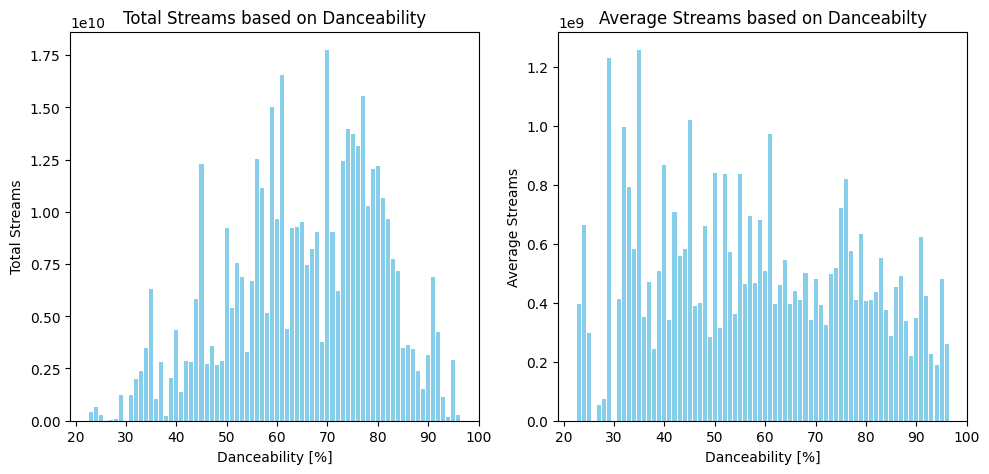

In [12]:
#Total streams based on danceability
danceStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='danceability_%', aggfunc='sum')
print('Total Streams')
display(danceStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on danceability
danceStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='danceability_%', aggfunc='mean')
print('Average Streams')
display(danceStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. danceability
axs[0].bar(danceStreams.index, danceStreams['streams'], color='skyblue')
axs[0].set_xlabel('Danceability [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Danceability')
#Average streams vs. danceability
axs[1].bar(danceStreamAvg.index, danceStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Danceability [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Danceabilty')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### Streams based on Valence %

Total Streams


,streams
valence_%,
24,1.301216e+10
53,1.181261e+10
42,1.015990e+10
40,9.672268e+09
45,9.360428e+09


Average Streams


,streams
valence_%,
93,1.417999e+09
12,1.269047e+09
95,1.113839e+09
21,1.020248e+09
38,1.005746e+09


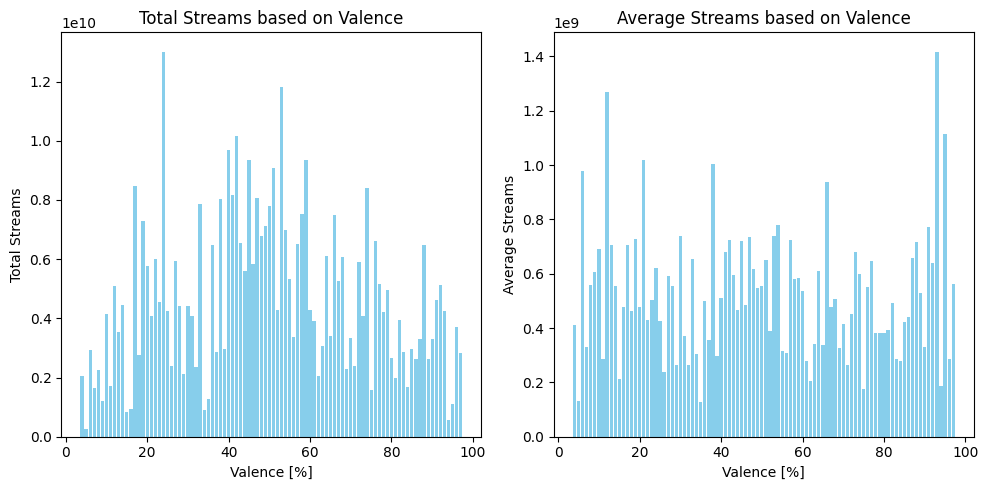

In [13]:
#Total streams based on Valence
valenceStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='valence_%', aggfunc='sum')
print('Total Streams')
display(valenceStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Valence
valenceStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='valence_%', aggfunc='mean')
print('Average Streams')
display(valenceStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Valence
axs[0].bar(valenceStreams.index, valenceStreams['streams'], color='skyblue')
axs[0].set_xlabel('Valence [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Valence')
#Average streams vs. Valence
axs[1].bar(valenceStreamAvg.index, valenceStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Valence [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Valence')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### Streams based on Energy

Total Streams


,streams
energy_%,
66,1.621373e+10
52,1.427733e+10
73,1.363552e+10
80,1.351592e+10
65,1.321418e+10


Average Streams


,streams
energy_%,
93,1.305763e+09
26,1.098487e+09
30,9.077186e+08
52,8.923330e+08
38,8.869762e+08


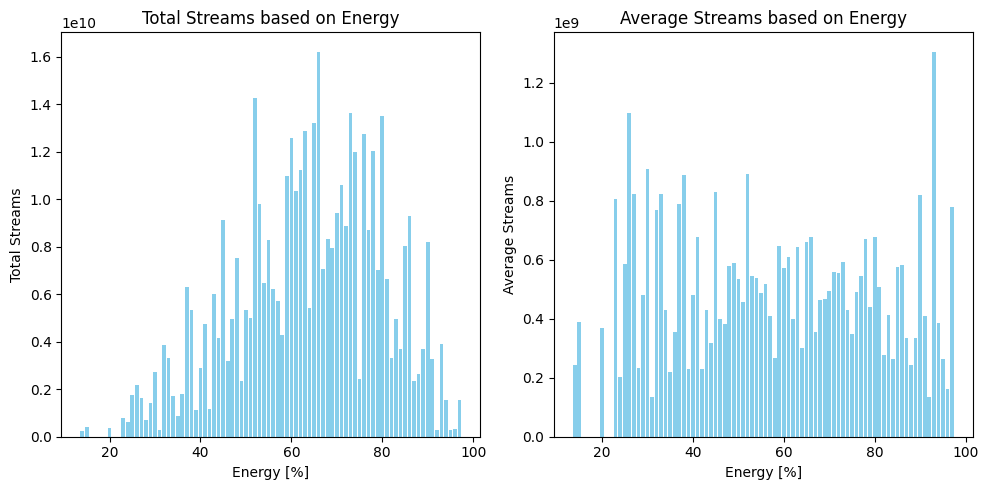

In [14]:
#Total streams based on Energy
energyStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='energy_%', aggfunc='sum')
print('Total Streams')
display(energyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Energy
energyStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='energy_%', aggfunc='mean')
print('Average Streams')
display(energyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Energy
axs[0].bar(energyStreams.index, energyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Energy [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Energy')
#Average streams vs. Energy
axs[1].bar(energyStreamAvg.index, energyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Energy [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Energy')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### Streams Based on Accousticness

Total Streams


,streams
acousticness_%,
0,3.091967e+10
1,3.004232e+10
4,2.158430e+10
2,1.883107e+10
3,1.754107e+10


Average Streams


,streams
acousticness_%,
58,1.662174e+09
63,1.521946e+09
54,1.424959e+09
97,1.410089e+09
93,1.240064e+09


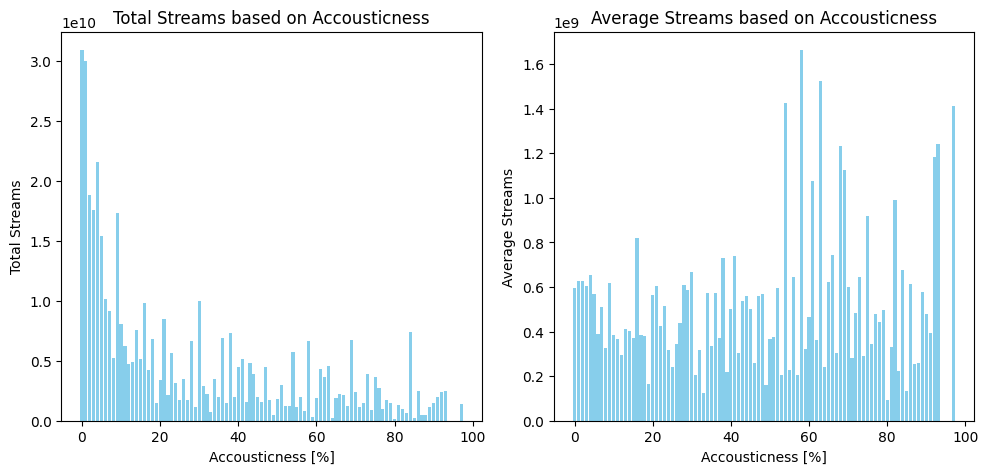

In [15]:
#Total streams based on Accousticness
accStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='acousticness_%', aggfunc='sum')
print('Total Streams')
display(accStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Accousticness
accStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='acousticness_%', aggfunc='mean')
print('Average Streams')
display(accStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Accousticness
axs[0].bar(accStreams.index, accStreams['streams'], color='skyblue')
axs[0].set_xlabel('Accousticness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Accousticness')
#Average streams vs. Accousticness
axs[1].bar(accStreamAvg.index, accStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Accousticness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Accousticness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

### Streams based on liveness

Total Streams


,streams
liveness_%,
9,5.156334e+10
11,4.353000e+10
10,4.059615e+10
12,2.788289e+10
8,2.638670e+10


Average Streams


,streams
liveness_%,
64,1.385757e+09
46,8.710787e+08
45,8.440645e+08
42,8.433009e+08
4,8.313533e+08


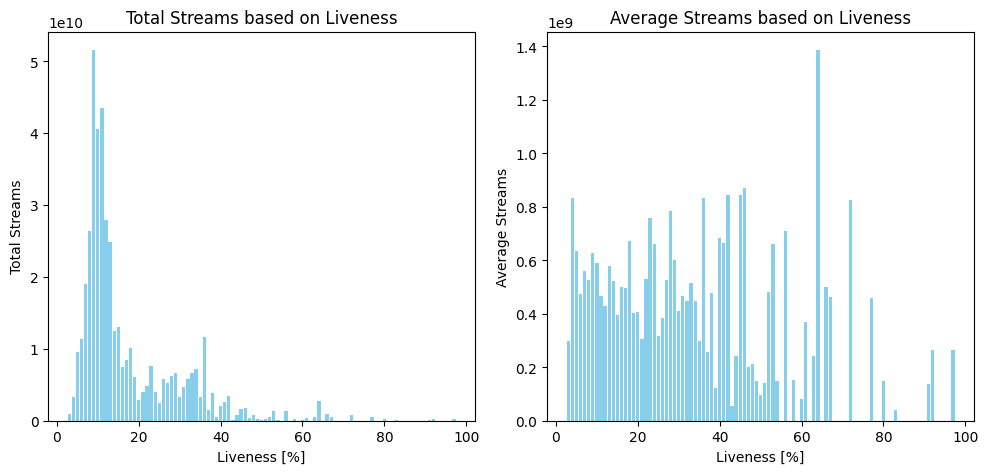

In [16]:
#Total streams based on liveness
livenessStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='liveness_%', aggfunc='sum')
print('Total Streams')
display(livenessStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on liveness
livenessStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='liveness_%', aggfunc='mean')
print('Average Streams')
display(livenessStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. liveness
axs[0].bar(livenessStreams.index, livenessStreams['streams'], color='skyblue')
axs[0].set_xlabel('Liveness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Liveness')
#Average streams vs. liveness
axs[1].bar(livenessStreamAvg.index, livenessStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Liveness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Liveness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

### Streams based on Speachiness

Total Streams


,streams
speechiness_%,
3,8.215348e+10
4,7.595194e+10
5,6.434998e+10
6,3.451057e+10
8,2.485985e+10


Average Streams


,streams
speechiness_%,
2,1.468183e+09
44,1.155506e+09
37,7.983765e+08
28,7.914525e+08
18,7.494015e+08


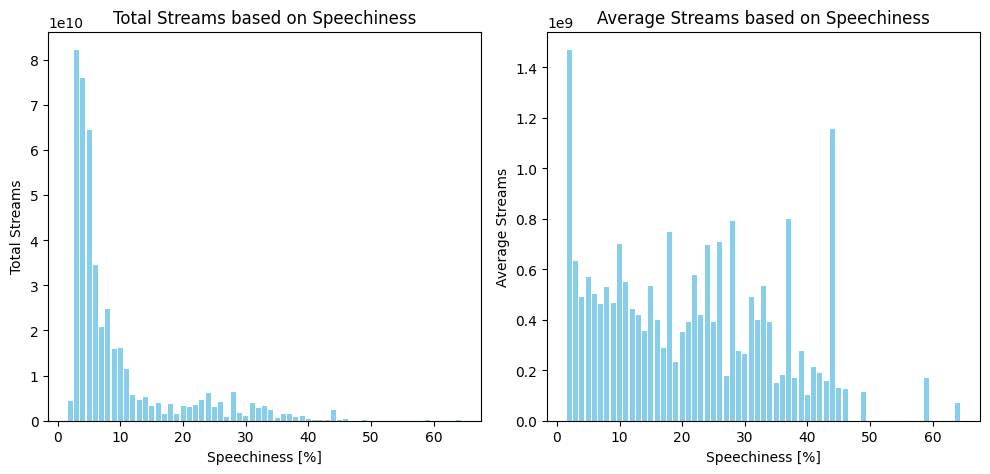

In [17]:
#Total streams based on speechiness
speechStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='speechiness_%', aggfunc='sum')
print('Total Streams')
display(speechStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on speechiness
speechStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='speechiness_%', aggfunc='mean')
print('Average Streams')
display(speechStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. speechiness
axs[0].bar(speechStreams.index, speechStreams['streams'], color='skyblue')
axs[0].set_xlabel('Speechiness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Speechiness')
#Average streams vs. speechiness
axs[1].bar(speechStreamAvg.index, speechStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Speechiness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Speechiness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

## Analysis of Data: Correlation

## Analysis of Data: Regression Tree

In [20]:
# Label encode the 'category' column
label_encoder = LabelEncoder()
spotifyDF_cleaned['key_encoded'] = label_encoder.fit_transform(spotifyDF_cleaned['key'])
# Extract features (X) and target values (y) from the dataframe
#X = spotifyDF_cleaned[['released_month', 'bpm', 'key_encoded', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']]
X = spotifyDF_cleaned[['bpm', 'key_encoded', 'danceability_%', 'energy_%', 'acousticness_%']]
y = spotifyDF_cleaned['streams']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
tree_regressor = DecisionTreeRegressor()

# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 7.254531522056913e+17


/var/folders/qx/p_nk1z1955n4bz60478z102c0000gn/T/ipykernel_20255/807284047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotifyDF_cleaned['key_encoded'] = label_encoder.fit_transform(spotifyDF_cleaned['key'])


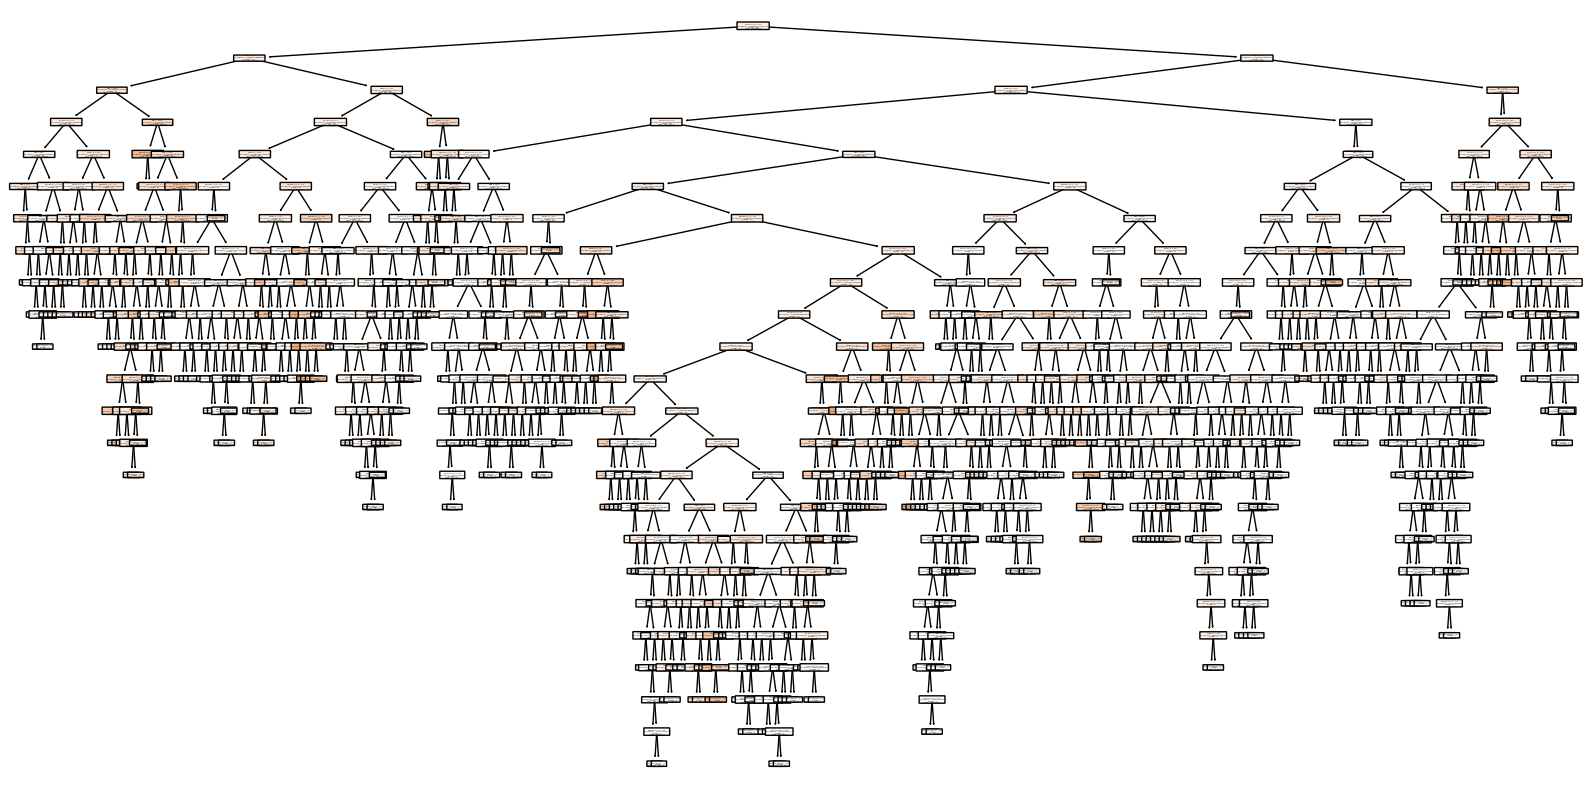

In [21]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()